In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.api.types import CategoricalDtype
from scipy.stats import shapiro
from scipy.stats import stats
from datetime import datetime
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

In [2]:
twitchdata = pd.read_csv("Twitch_game_data.csv")

In [3]:
df = twitchdata.copy()

In [4]:
df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.290
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.620
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.260
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.290
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.030


In [5]:
df.tail()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
12745,196,Cuphead,4,2021,795329,31721 hours,90364,98,7795,1106,44,25.070
12746,197,Hades,4,2021,794472,52755 hours,36447,152,8663,1104,73,15.060
12747,198,Epic Seven,4,2021,778750,18362 hours,11670,47,997,1083,25,42.410
12748,199,Pok<U+00E9>mon Platinum,4,2021,777305,22380 hours,61580,76,2837,1081,31,34.730
12749,200,Farming Simulator 19,4,2021,771697,91602 hours,11019,319,7942,1073,127,8.420


In [6]:
df.shape

(12750, 12)

In [7]:
df.dtypes

Rank                  int64
Game                 object
Month                 int64
Year                  int64
Hours_watched         int64
Hours_Streamed       object
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
dtype: object

In [8]:
df.isnull().sum()

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.Year = df.Year.astype(CategoricalDtype(ordered = True))
df.Month = df.Month.astype(CategoricalDtype(ordered = True))

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,12749.000,100.593,57.821,1.000,50.000,101.000,151.000,200.000
Hours_watched,12749.000,4276021.378,15068334.875,89811.000,332588.000,718122.000,1975274.000,344551979.000
Peak_viewers,12749.000,49663.769,118288.654,441.000,7656.000,18349.000,41709.000,3123208.000
Peak_channels,12749.000,525.179,2543.382,1.000,47.000,109.000,286.000,129860.000
Streamers,12749.000,16072.632,53542.644,0.000,1345.000,3767.000,9889.000,1013029.000
Avg_viewers,12749.000,5869.388,20709.796,120.000,456.000,982.000,2716.000,479209.000
Avg_channels,12749.000,194.272,720.292,0.000,15.000,38.000,108.000,13789.000
Avg_viewer_ratio,12749.000,84.364,379.366,2.270,15.960,29.070,58.100,13601.870


In [12]:
df["Game"].value_counts().count()

1639

In [13]:
df["Year"].value_counts()

2020    2400
2018    2400
2017    2400
2019    2399
2016    2350
2021     800
Name: Year, dtype: int64

In [14]:
df.corr()

,Rank,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
Rank,1.000,-0.390,-0.346,-0.251,-0.354,-0.390,-0.339,0.072
Hours_watched,-0.390,1.000,0.734,0.547,0.758,1.000,0.767,-0.019
Peak_viewers,-0.346,0.734,1.000,0.560,0.588,0.732,0.582,0.066
Peak_channels,-0.251,0.547,0.560,1.000,0.756,0.547,0.798,-0.028
Streamers,-0.354,0.758,0.588,0.756,1.000,0.757,0.962,-0.043
Avg_viewers,-0.390,1.000,0.732,0.547,0.757,1.000,0.766,-0.019
Avg_channels,-0.339,0.767,0.582,0.798,0.962,0.766,1.000,-0.039
Avg_viewer_ratio,0.072,-0.019,0.066,-0.028,-0.043,-0.019,-0.039,1.000


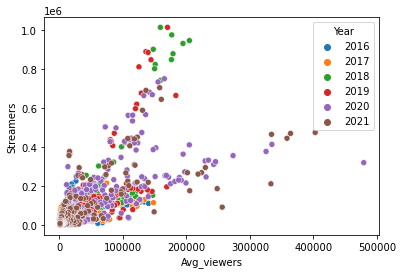

In [15]:
sns.scatterplot(x = "Avg_viewers", y = "Streamers", 
                hue = "Year", 
                data = df);

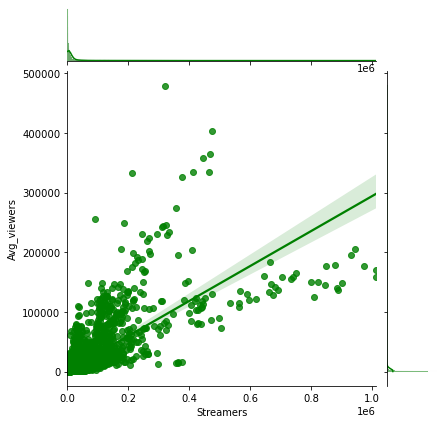

In [16]:
sns.jointplot(x = "Streamers" , y = "Avg_viewers" ,
              color = "g" , 
              kind = "reg" ,
              data = df);

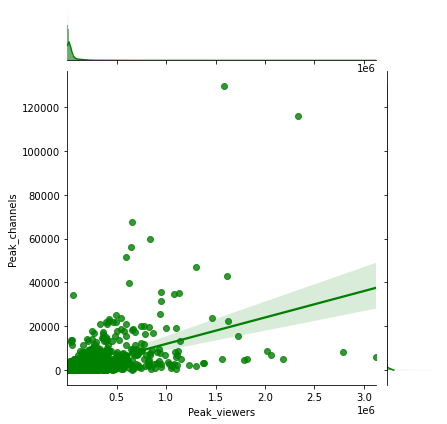

In [17]:
sns.jointplot(x = "Peak_viewers", y = "Peak_channels", 
              color = "g" , 
              kind = "reg" ,
              data = df);

In [18]:
test_statistics, pvalue = shapiro(df["Streamers"])
print('Test Statistics for Streamers = %.4f, p-value = %.4f' % (test_statistics, pvalue));
test_istatistigi, pvalue = shapiro(df["Avg_viewers"])
print('Test Statistics for Avg_viewers = %.4f, p-value = %.4f' % (test_statistics, pvalue));
test_statistics, pvalue = shapiro(df["Peak_viewers"])
print('Test Statistics for Peak_viewers = %.4f, p-value = %.4f' % (test_statistics, pvalue));
test_statistics, pvalue = shapiro(df["Peak_channels"])
print('Test Statistics for Peak_channels= %.4f, p-value = %.4f' % (test_statistics, pvalue));

Test Statistics for Streamers = 0.2655, p-value = 0.0000
Test Statistics for Avg_viewers = 0.2655, p-value = 0.0000
Test Statistics for Peak_viewers = 0.3557, p-value = 0.0000
Test Statistics for Peak_channels= 0.1452, p-value = 0.0000


In [19]:
test_statistics, pvalue = stats.spearmanr(df["Streamers"],df["Avg_viewers"])

print('Corr Value = %.4f, p-value = %.4f' % (test_statistics, pvalue))

Corr Value = 0.6889, p-value = 0.0000


In [20]:
test_statistics, pvalue = stats.spearmanr(df["Peak_viewers"],df["Peak_channels"])

print('Corr Value = %.4f, p-value = %.4f' % (test_statistics, pvalue))

Corr Value = 0.4457, p-value = 0.0000


In [21]:
df['Date'] = df.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}", '%Y-%m'),axis=1)
df.drop(['Month','Year'], axis='columns', inplace = True)

In [22]:
dflol = df[df["Game"] == "League of Legends"]
dfdota2 = df[df["Game"] == "Dota 2"]
dfcsgo = df[df["Game"] == "Counter-Strike: Global Offensive"]

In [23]:
x = ["Rank","Game","Hours_watched","Hours_Streamed","Peak_viewers","Peak_channels","Streamers","Avg_channels","Avg_viewer_ratio"]
dflol.drop(x, axis = 1 , inplace = True)
dfdota2.drop(x, axis = 1 , inplace = True)
dfcsgo.drop(x, axis = 1 , inplace = True)

In [24]:
dflol.columns = ["y" , "ds"]
dfdota2.columns = ["y" , "ds"]
dfcsgo.columns = ["y" , "ds"]

In [25]:
dflol.head()

,y,ds
0,127021,2016-01-01
150,134035,2016-02-01
350,127206,2016-03-01
550,122933,2016-04-01
750,108585,2016-05-01


In [26]:
dfdota2.head()

,y,ds
2,60815,2016-01-01
152,59243,2016-02-01
352,57288,2016-03-01
552,59375,2016-04-01
752,63009,2016-05-01


In [27]:
dfcsgo.head()

,y,ds
1,64378,2016-01-01
151,64652,2016-02-01
351,96854,2016-03-01
551,99754,2016-04-01
753,60407,2016-05-01


In [28]:
m = Prophet(interval_width = 0.95 , daily_seasonality = True)
model1 = m.fit(dflol)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [29]:
future = m.make_future_dataframe(periods = 16 , freq = "M")
forecastlol = m.predict(future)

In [30]:
forecastlol[["ds" , "yhat"]].iloc[66:80]

,ds,yhat
66,2021-06-30,191044.610
67,2021-07-31,216476.182
68,2021-08-31,205885.436
69,2021-09-30,271265.356
70,2021-10-31,244731.412
71,2021-11-30,209007.485
72,2021-12-31,221405.393
73,2022-01-31,258183.464
74,2022-02-28,281933.764
75,2022-03-31,241498.182


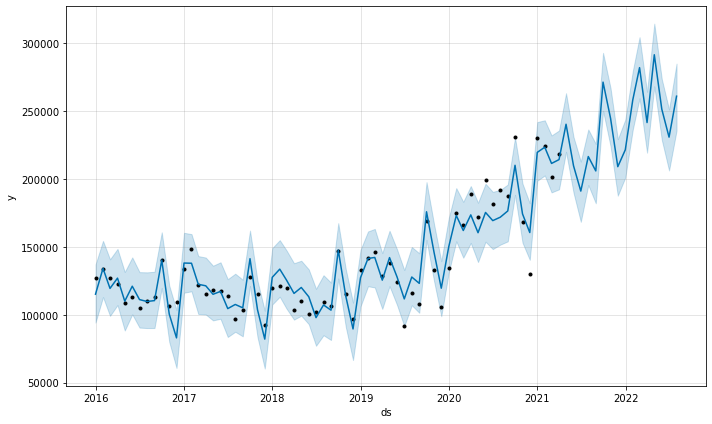

In [31]:
plotlol = m.plot(forecastlol)

In [32]:
plottlol = m.plot_components(forecast)

NameError: name 'forecast' is not defined

In [ ]:
n = Prophet(interval_width = 0.95 , daily_seasonality = True)
model2 = n.fit(dfdota2)

In [ ]:
forecastdota2 = n.predict(future)

In [ ]:
forecastdota2[["ds" , "yhat"]].iloc[66:80]

In [ ]:
plotdota2 = n.plot(forecastdota2)

In [ ]:
plottdota2 = n.plot_components(forecastdota2)

In [ ]:
b = Prophet(interval_width = 0.95 , daily_seasonality = True)
model3 = b.fit(dfcsgo)

In [ ]:
forecastcsgo = b.predict(future)

In [ ]:
forecastcsgo[["ds" , "yhat"]].iloc[66:80]

In [ ]:
plotcsgo = b.plot(forecastcsgo)

In [ ]:
plottcsgo = b.plot_components(forecastcsgo)

In [ ]:
## end